Before we start, we need some data to work with. Let's create a simple dataset using Python's `pandas` library and `faker` to generate random data.

In [19]:
import faker
import pandas as pd
import logging

In [20]:
import nltk

print(nltk.data.path)

['C:\\Users\\dunn0172/nltk_data', 'c:\\Users\\dunn0172\\Documents\\GitHub\\biorepository_data_wrangling2\\.venv\\nltk_data', 'c:\\Users\\dunn0172\\Documents\\GitHub\\biorepository_data_wrangling2\\.venv\\share\\nltk_data', 'c:\\Users\\dunn0172\\Documents\\GitHub\\biorepository_data_wrangling2\\.venv\\lib\\nltk_data', 'C:\\Users\\dunn0172\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [21]:
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [22]:
from faker_biospecimen.study import StudyProvider
from faker_biospecimen.researcher import ResearcherProvider

In [23]:
fake = faker.Faker()
fake.add_provider(StudyProvider)
fake.add_provider(ResearcherProvider)

In [24]:
study = fake.study()
print(study.principal_investigator)
print(study.to_dict())

Researcher(name=Donna Jones MD JD LPN, email=nelsonlisa@example.org)
{'name': 'UNNETHE', 'description': 'The UNNETHE study aims to investigate the interaction between Malate dehydrogenase and Serine protease in the context of the oogonium. ', 'start_date': '1978-09-16', 'end_date': '1995-12-25', 'principal_investigator': 'Donna Jones MD JD LPN <nelsonlisa@example.org>'}


In [25]:
def generate_synthetic_specimens(num_samples=100):
    """Generate synthetic specimen data."""
    data = {
        "specimen_id": [fake.ean8() for _ in range(num_samples)],
        "collection_date": [
            fake.past_datetime(start_date="-5y") for _ in range(num_samples)
        ],
        "sample_type": [
            fake.random_element(elements=("plasma", "urine", "serum"))
            for _ in range(num_samples)
        ],
    }
    return pd.DataFrame(data)

In [26]:
synthetic_data = generate_synthetic_specimens(1000)
print(synthetic_data.head())

  specimen_id     collection_date sample_type
0    83431180 2022-09-29 16:45:18      plasma
1    40935324 2024-02-10 16:38:40      plasma
2    76294310 2023-10-05 07:22:05       urine
3    93234238 2023-09-16 12:33:07       urine
4    77442093 2021-01-28 20:18:00       urine


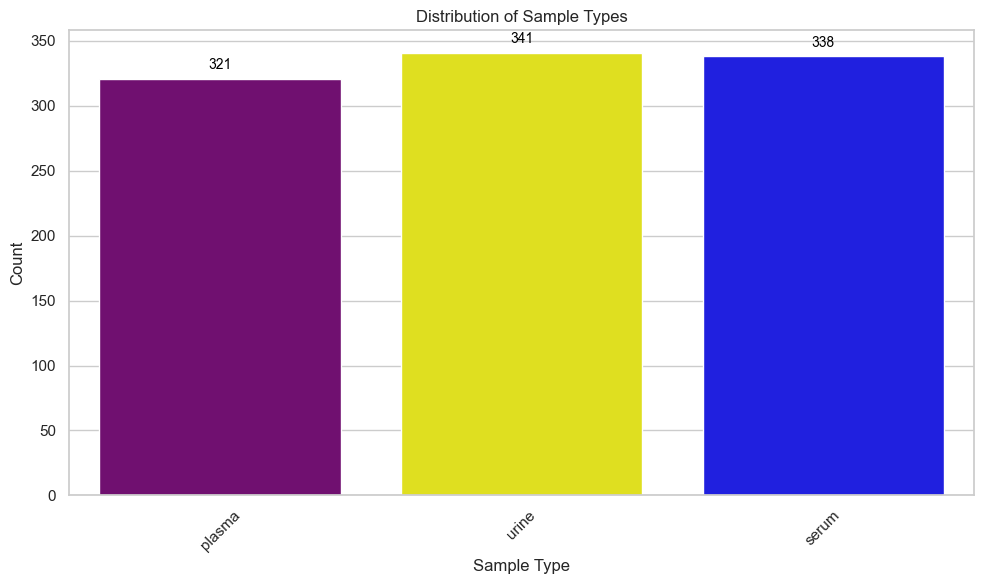

In [27]:
# Plot the distribution of sample types, color-coded by sample type
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(
    data=synthetic_data,
    x="sample_type",
    legend=False,
    hue="sample_type",
    palette={"plasma": "purple", "urine": "yellow", "serum": "blue"},
)
# Add specimen counts to the bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10,
        color="black",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.title("Distribution of Sample Types")
plt.xlabel("Sample Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()